1. Importing the dependencies

In [243]:
import pandas as pd #ini buat baca data
import numpy as np #ini buat manipulasi data
import matplotlib.pyplot as plt #ini buat visualisasi data
import seaborn as sns #ini buat visualisasi data  
from sklearn.preprocessing import LabelEncoder #ini buat encode label
from imblearn.over_sampling import SMOTE #ini buat oversampling
from sklearn.model_selection import train_test_split, cross_val_score #ini buat split data  
from sklearn.tree import DecisionTreeClassifier #ini buat decision tree
from sklearn.ensemble import RandomForestClassifier #ini buat random forest
from xgboost import XGBClassifier  #ini buat xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #ini buat evaluasi model
import pickle #ini buat save model

2. Data Loading and Understanding

In [244]:
#load the csv data to pandas dataframe
df = pd.read_csv(r'C:\Users\ThinkPad\Documents\DS Project\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [245]:
df.shape # ini buat liat ukuran data

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [248]:
# dropping the customerID columns as this is not required for modelling
df.drop(columns=['customerID'], inplace=True)   

In [249]:
# printing the unique values in the columns

numerical_features_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numerical_features_list:
        print(col, df[col].unique())
        print("="*55) 

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [250]:
df.isnull().sum() # ini buat liat missing value di setiap kolom

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [251]:
len(df[df['TotalCharges']==" "]) # ini buat liat berapa banyak data yang kosong di TotalCharges

11

In [252]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0.0") # ini buat ganti data yang kosong di TotalCharges jadi 0.0  

In [253]:
df['TotalCharges'] = df['TotalCharges'].astype(float) # ini buat convert TotalCharges ke float

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [255]:
# chechking the class distribution of the target variable
df['Churn'].value_counts() # ini buat liat distribusi data di kolom Churn

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Insights:**
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis**

In [256]:
df.shape # ini buat liat ukuran data setelah diolah

(7043, 20)

In [257]:
df.head(2) # ini buat liat 2 data teratas

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [258]:
df.describe() # ini buat liat statistik deskriptif dari data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features - Analysis**

Understand the distribution of the numerical features

In [259]:
def plot_historam(df, column_name):
    plt.figure(figsize=(5, 3)) # ini buat ukuran figure
    sns.histplot(df[column_name], kde=True) # ini buat plot histogram
    plt.title(f"{column_name}") # ini buat judul plot

    # calculate the mean and median values for the column
    col_mean = df[column_name].mean() 
    col_median = df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(col_median, color='green', linestyle='-', label='Median')

    # add a legend
    plt.legend()

    plt.show()

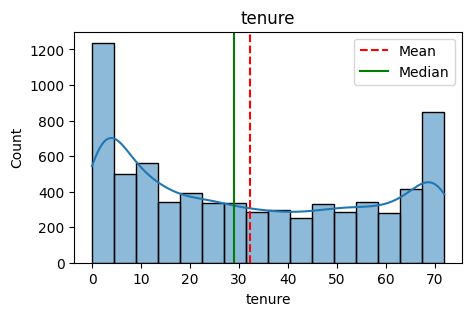

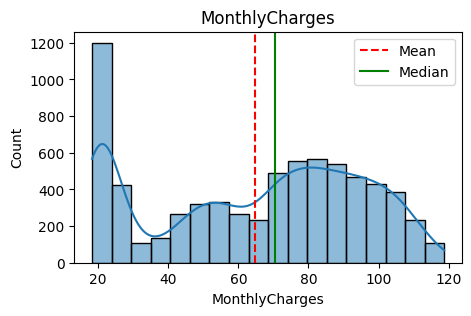

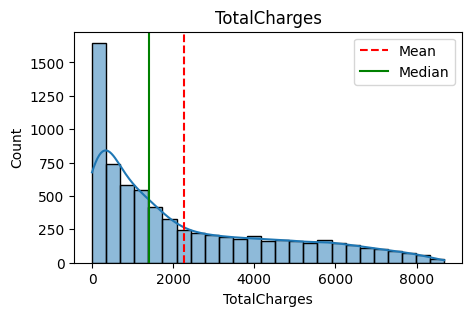

In [260]:
for col in numerical_features_list:
    plot_historam(df, col)


**Boxplot for numerical features**

In [261]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5, 3)) # ini buat ukuran figure
    sns.boxplot(x=df[column_name]) # ini buat plot boxplot
    plt.title(f"{column_name}") # ini buat judul plot
    plt.show()

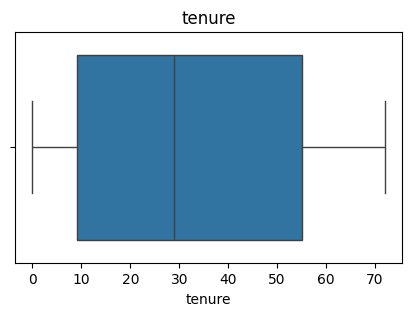

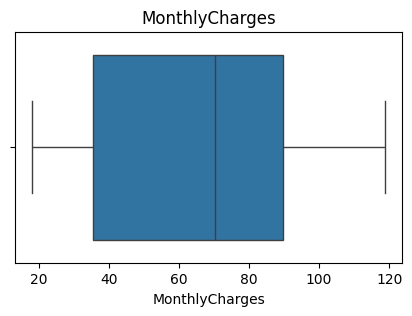

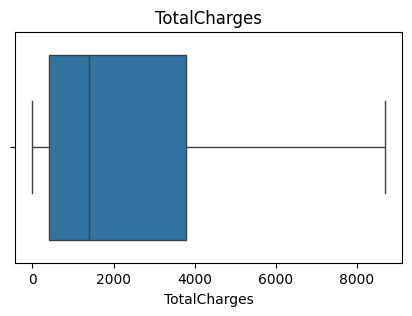

In [262]:
for col in numerical_features_list:
    plot_boxplot(df, col) # ini buat plot boxplot

**Correlation Heatmap for numerical columns**

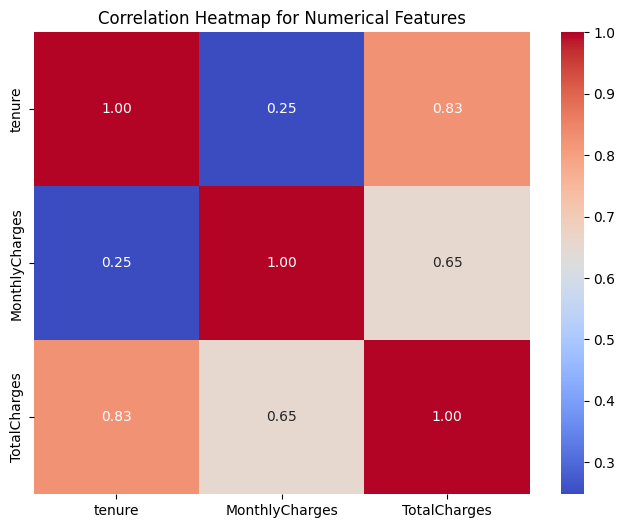

In [263]:
plt.figure(figsize=(8, 6))
corr = df[numerical_features_list].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

**Categorical features - Analysis**

In [264]:
df.dtypes # ini buat liat tipe data di setiap kolom

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

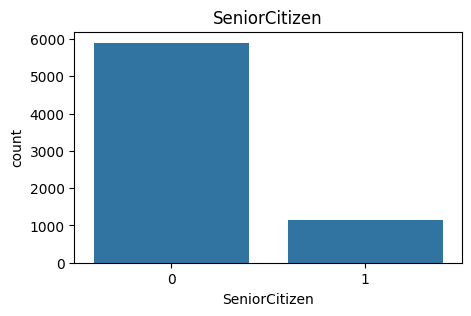

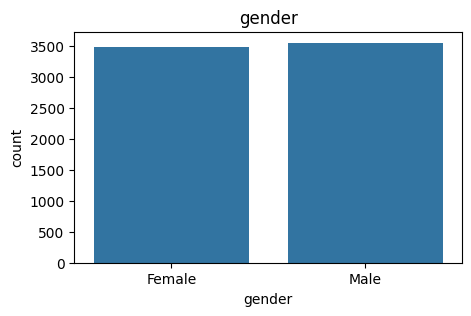

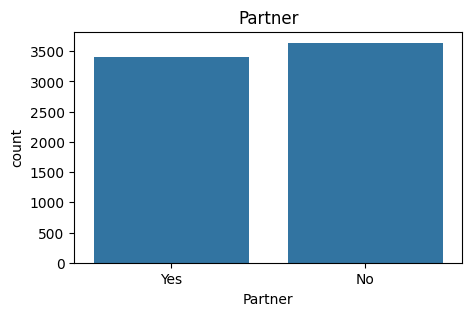

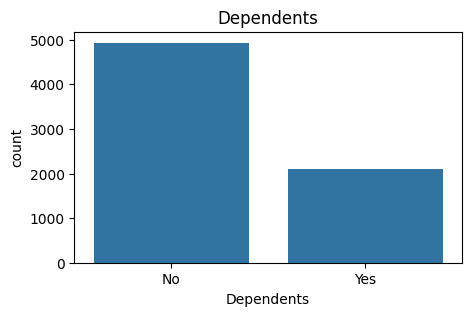

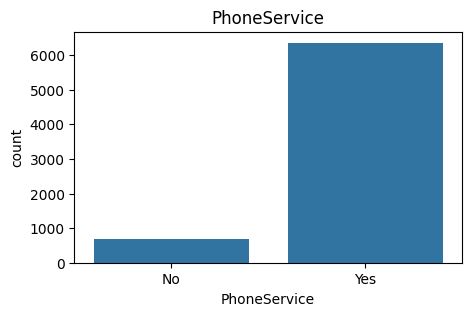

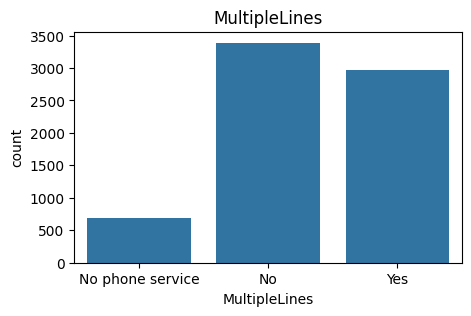

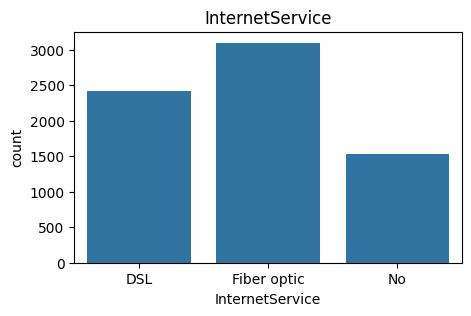

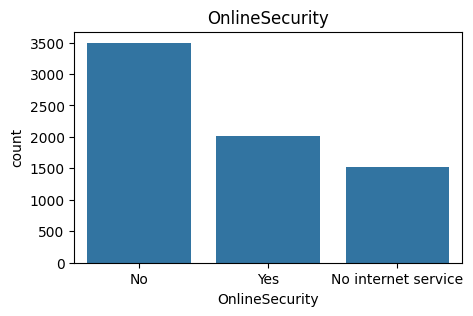

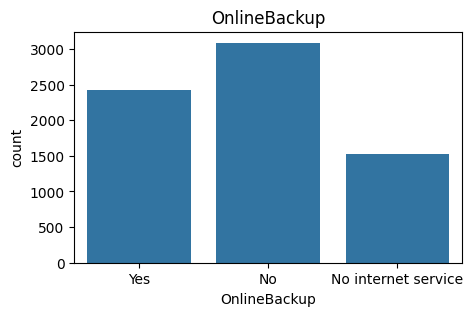

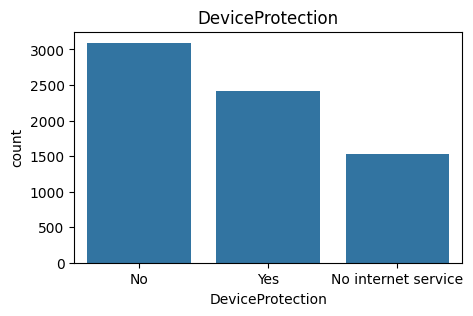

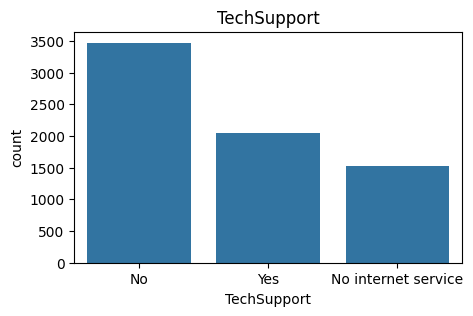

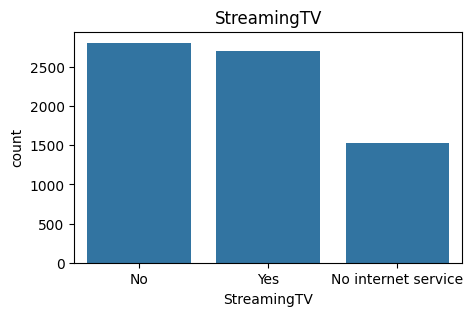

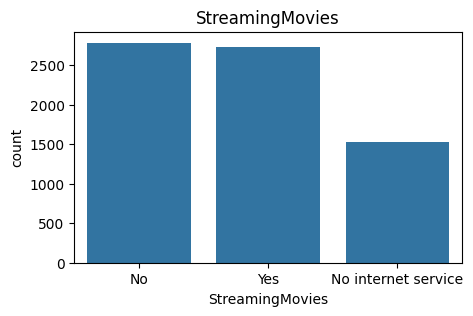

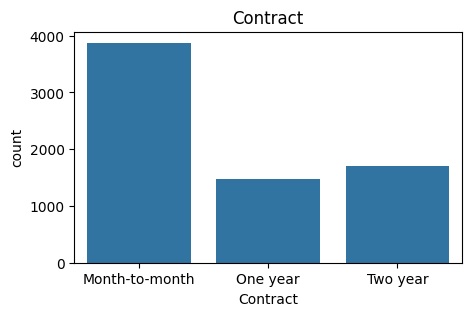

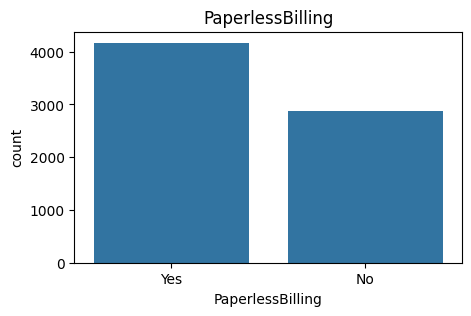

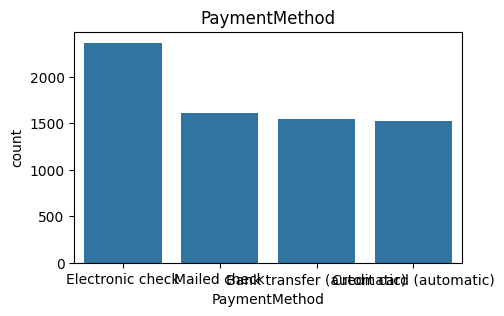

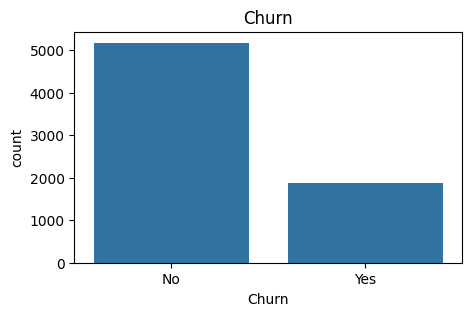

In [265]:
object_columns = df.select_dtypes(include=['object']).columns.to_list() # ini buat milih kolom yang bertipe object

object_columns =  ['SeniorCitizen'] + object_columns # ini buat nambahin kolom SeniorCitizen ke list object_columns

for col in object_columns:
    plt.figure(figsize=(5, 3)) # ini buat ukuran figure
    sns.countplot(x=df[col]) # ini buat plot countplot
    plt.title(f"{col}") # ini buat judul plot
    plt.show() # ini buat show plot


**4. Data Preprocessing**

Label encoding of target column

In [266]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) # ini buat encode kolom Churn jadi 1 dan 0
df['Churn'].value_counts() # ini buat liat distribusi data di kolom Churn

Churn
0    5174
1    1869
Name: count, dtype: int64

Label encoding of categorical features

In [267]:
# Identifying columns with object data type
object_columns = df.select_dtypes(include=['object']).columns.to_list() # ini buat milih kolom yang bertipe object
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [268]:
# Initialize a dictionary to save the encoders
label_encoders = {}

# Loop through each object column and apply label encoding
for col in object_columns:
    le = LabelEncoder() # ini buat inisialisasi label encoder
    df[col] = le.fit_transform(df[col]) # ini buat encode kolom
    label_encoders[col] = le # ini buat simpen encoder ke dictionary

# save the label encoders to a pickle file
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [269]:
label_encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [270]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


**Training and test data split**

In [271]:
# splitting the features and target
x = df.drop(columns=['Churn']) # ini buat milih semua kolom kecuali Churn
y = df['Churn'] # ini buat milih kolom Churn
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y) # ini buat split data jadi train dan test
# checking the shape of the data
x_train.shape, x_test.shape, y_train.shape, y_test.shape # ini buat liat ukuran data setelah di split
# checking the class distribution of the target variable
y_train.value_counts() # ini buat liat distribusi data di kolom Churn

Churn
0    4139
1    1495
Name: count, dtype: int64

**Synthetic Minority Oversampling Technique (SMOTE)**

In [272]:
smote = SMOTE(random_state=42) # ini buat inisialisasi smote

In [273]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train) # ini buat oversampling data
# checking the shape of the data after oversampling 
y_train.shape, y_train_smote.shape # ini buat liat ukuran data setelah di oversampling

((5634,), (8278,))

In [274]:
y_train_smote.value_counts() # ini buat liat distribusi data di kolom Churn setelah di oversampling

Churn
0    4139
1    4139
Name: count, dtype: int64

In [275]:
# Gabungkan x_train dan y_train
train_df = x_train.copy()
train_df['Churn'] = y_train.values
print("Gabungan x_train dan y_train:")
print(train_df)

Gabungan x_train dan y_train:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3738       1              0        0           0      35             0   
3151       1              0        1           1      15             1   
4860       1              0        1           1      13             0   
3867       0              0        1           0      26             1   
3810       1              0        1           1       1             1   
...      ...            ...      ...         ...     ...           ...   
6303       0              0        1           0      71             1   
6227       1              0        0           0       2             1   
4673       0              1        0           0      25             1   
2710       0              0        1           0      24             1   
5639       1              0        0           0       6             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3738       

In [276]:

# Gabungkan x_train_smote dan y_train_smote
train_smote_df = x_train_smote.copy()
train_smote_df['Churn'] = y_train_smote.values
print("\nGabungan x_train_smote dan y_train_smote:")
print(train_smote_df)


Gabungan x_train_smote dan y_train_smote:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        0           0      35             0   
1          1              0        1           1      15             1   
2          1              0        1           1      13             0   
3          0              0        1           0      26             1   
4          1              0        1           1       1             1   
...      ...            ...      ...         ...     ...           ...   
8273       0              0        0           0       8             1   
8274       0              0        0           0      12             1   
8275       1              0        0           0      48             1   
8276       0              0        0           0       2             1   
8277       0              0        0           0       1             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  

**5. Model Training**

Training with default hyperparameters


In [277]:
#dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, random_state=42)
}

In [278]:
 # dictionary to store the cross validation scores
cv_scores = {}

# perform 5 fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameter") # ini buat liat model yang lagi di training
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy') # ini buat cross validation
    cv_scores[model_name] = scores # ini buat simpen hasil cross validation ke dictionary    
    print(f"{model_name}Cross Validation Accuracy: {np.mean(scores):.2f}") # ini buat liat hasil cross validation
    print("="*55) # ini buat garis pemisah

Training Decision Tree with default parameter
Decision TreeCross Validation Accuracy: 0.74
Training Random Forest with default parameter
Random ForestCross Validation Accuracy: 0.79
Training XGBoost with default parameter


c:\Users\ThinkPad\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:07:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ThinkPad\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:07:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ThinkPad\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:07:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ThinkPad\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:07:57] WARNI

XGBoostCross Validation Accuracy: 0.78


c:\Users\ThinkPad\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:07:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [279]:
cv_scores # ini buat liat hasil cross validation dari semua model

{'Decision Tree': array([0.73203194, 0.74001775, 0.75066548, 0.7364685 , 0.72202487]),
 'Random Forest': array([0.80124224, 0.79414374, 0.78527063, 0.77196096, 0.78152753]),
 'XGBoost': array([0.80390417, 0.77905945, 0.7826087 , 0.77462289, 0.77708703])}

Random Forest gives the highest accuracy compared to other models with default parameters

Training with hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid untuk RandomForestClassifier dengan regularisasi (min_samples_leaf, max_depth, min_samples_split)
param_grid = {
    'n_estimators': [100],           # jumlah pohon
    'max_depth': [20, 30],           # kedalaman maksimum pohon
    'min_samples_split': [5],          # minimal sampel untuk split node
    'min_samples_leaf': [1],       # minimal sampel di leaf node
}

# Inisialisasi RandomForestClassifier
rf_reg = RandomForestClassifier(random_state=42)

# GridSearchCV untuk mencari hyperparameter terbaik
grid = GridSearchCV(rf_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train_smote, y_train_smote)

print("Best parameters:", grid.best_params_)
print("Best cross-validation accuracy:", grid.best_score_)

# Fit model terbaik ke data train
rf_reg = grid.best_estimator_
rf_reg.fit(x_train_smote, y_train_smote)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.8405525635973554


RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

**6. Model Evaluation**

In [290]:
# Prediksi data test menggunakan model rf_reg
y_test_pred_down = rf_reg.predict(x_test)

# Evaluasi hasil prediksi
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_down):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_down))
print("Classification Report:")
print(classification_report(y_test, y_test_pred_down))

Accuracy: 0.78
Confusion Matrix:
[[873 162]
 [148 226]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



**7. Load the saved model and build a Predicted System**

In [282]:
# save the trained model to a pickle file
model_data = {
    'model': rf_reg, # ini buat simpen model ke dictionary
    'feature_names' : x_train.columns.tolist(), # ini buat simpen nama fitur ke dictionary
}

with open('customer_churn_model.pkl', 'wb') as f:
    pickle.dump(model_data, f) # ini buat simpen model ke file

# load the model from the pickle file
loaded_model = model
feature_names = model_data['feature_names'] # ini buat load nama fitur dari file

In [283]:
# load the saved model and the feature names

with open('customer_churn_model.pkl', 'rb') as f:
    loaded_model_data = pickle.load(f) # ini buat load model dari file
    loaded_model = loaded_model_data['model'] # ini buat load model dari dictionary
    feature_names = loaded_model_data['feature_names'] # ini buat load nama fitur dari dictionary   


In [284]:
loaded_model

RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [285]:
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [286]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85,
}

In [287]:
input_datadf = pd.DataFrame([input_data]) # ini buat convert input data ke dataframe

In [288]:
with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f) # ini buat load label encoders dari file    

# encode categorical features using the saved_encoders
for column, encoder in label_encoders.items():
    # encode hanya jika kolom bertipe object/string pada input
    if column in input_datadf.columns and input_datadf[column].dtype == object:
        input_datadf[column] = encoder.transform(input_datadf[column]) # ini buat encode kolom di input data

# make prediction
prediction = loaded_model.predict(input_datadf) # ini buat prediksi data
print(f"Prediction: {prediction[0]}") # ini buat liat hasil prediksi
# 0 = No Churn, 1 = Churn
# checking the probability of the prediction
probability = loaded_model.predict_proba(input_datadf) # ini buat prediksi probabilitas
print(f"Probability: {probability[0]}") # ini buat liat hasil prediksi probabilitas

Prediction: 0
Probability: [0.65978571 0.34021429]


**TO DO:**
1. Implement Hyperparameter Tuning
2. Try Model Selection
3. Try downsampling
4. Try to address the overfitting
5. Try Stratified k fold CV